In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from math import sin, cos, pi
import tensorflow as tf
from keras.applications import MobileNet
from keras.layers import Conv2D, LeakyReLU, GlobalAveragePooling2D, Dropout, Dense
from keras.models import Sequential


from keras.layers import Activation,Convolution2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout,Conv2D,MaxPool2D,ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [2]:

model = Sequential()

# Input dimensions: (None, 96, 96, 1)
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 96, 96, 32)
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 48, 48, 32)
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 48, 48, 64)
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 24, 24, 64)
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 24, 24, 96)
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 12, 12, 96)
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 12, 12, 128)
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 6, 6, 128)
model.add(Convolution2D(96, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 6, 6, 256)
model.add(Convolution2D(96, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 3, 3, 256)
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 3, 3, 512)
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

# Input dimensions: (None, 3, 3, 512)
model.add(Flatten())
model.add(Dense(512,activation='linear'))
model.add(Dropout(0.1))
model.add(Dense(52))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        864       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [3]:
model.load_weights('BN_13oct/cp-113.pkl')

In [4]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

(96, 96, 3)
(1, 96, 96, 3)
[[0.24523652 0.4060259  0.24674714 0.47045875 0.24290109 0.5313829
  0.25967658 0.60590696 0.26694033 0.6674941  0.29440182 0.71949947
  0.3493204  0.7741829  0.39874417 0.8132356  0.45286617 0.8310262
  0.5081393  0.812381   0.562828   0.78295565 0.61767715 0.7367449
  0.6484103  0.6921661  0.67447126 0.64305484 0.69171214 0.5765004
  0.70135194 0.5106026  0.7153076  0.45222822 0.29358274 0.3561983
  0.33553818 0.31927127 0.39130113 0.3186399  0.42360112 0.32002118
  0.4596768  0.34160426 0.5439142  0.3565391  0.5826687  0.3391677
  0.62464964 0.34351468 0.6582911  0.36068705]]
x_cor: [23.542706, 23.687725, 23.318504, 24.928951, 25.62627, 28.262575, 33.53476, 38.27944, 43.47515, 48.781372, 54.031487, 59.297005, 62.24739, 64.74924, 66.404366, 67.32979, 68.669525, 28.183943, 32.211666, 37.564907, 40.665707, 44.128975, 52.215763, 55.936195, 59.966366, 63.195946]
y_cor: [38.978485, 45.16404, 51.01276, 58.16707, 64.07944, 69.071945, 74.32156, 78.07062, 79.77852, 

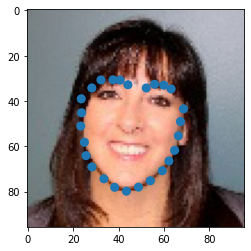

In [11]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle

image_test = "test_images/testimage2.jpg"
test_image = cv2.imread(image_test)
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('final_test.jpg',test_image)
images = np.array(test_image)/255.0

print(images.shape)
testt=np.expand_dims(images,axis=0)
print(testt.shape)

ans = model.predict(testt)
print(abs(ans))

ans = ans * 96
counter = 0
test_x = []
test_y = []
for i in abs(ans[0]):
    if counter%2==0:
        test_x.append(i)
    else:
        test_y.append(i)
    
    counter = counter+1
    
print("x_cor:",test_x)
print("y_cor:",test_y)

image_file = 'final_test.jpg'
img = plt.imread(image_file)
# rotate_img = rotate(img, 90)


# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# ax.imshow(rotate_img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,yy in zip(test_x,test_y):
    circ = Circle((xx,yy),2)
    ax.add_patch(circ)

# Show the image
plt.show()

In [5]:
import cv2
  
vid = cv2.VideoCapture('jhanvi.mp4')
  
while(True):

    ret, frame = vid.read()
    
#     test_image = cv2.imread(frame)
    test_image = cv2.resize(frame,(96,96))
    
    display_image = cv2.resize(frame,(400,400))
    #cv2.imwrite('final_test.jpg',test_image)
    images = np.array(test_image)/255.0

    #print(images.shape)
    testt=np.expand_dims(images,axis=0)
    #print(testt.shape)

    ans = model.predict(testt)
    #print(abs(ans))

    #ans = ans * 96
    display_ans = ans * 400
    print(display_ans)
    counter = 0
    test_x = []
    test_y = []
    for i in abs(display_ans[0]):
        if counter%2==0:
            test_x.append(i)
        else:
            test_y.append(i)

        counter = counter+1
        
    for (x,y) in zip(test_x, test_y):
    # Draw the circle to mark the keypoint 
        cv2.circle(display_image, (x,y), 1, (0, 0, 255), -1)
            
    cv2.imshow('frame', display_image)
      

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()


cv2.destroyAllWindows()

[[107.27643  137.42107  110.31345  153.30174  111.46989  165.51553
  116.39322  181.20909  119.70601  193.98099  135.03836  203.23055
  157.38142  216.3721   171.99419  218.95218  191.8454   221.21043
  221.31491  225.02046  244.50569  212.5735   261.33713  206.28954
  278.74515  193.68474  286.9457   182.0541   292.48264  166.29727
  291.51645  152.22826  291.88602  133.50438  124.19827  131.18301
  135.34676  123.63474  148.97357  121.7121   168.86377  122.46098
  184.05855  126.78075  209.42485  125.466415 226.14993  123.310616
  245.31737  121.793625 260.65912  125.39848 ]]
[[107.96876  137.39337  110.79669  153.45175  112.21589  165.5605
  117.07039  181.25018  120.39653  193.86143  135.74583  203.14438
  158.1235   216.2652   172.7169   218.84229  192.47488  221.0069
  221.91672  224.80417  244.85274  212.48259  261.70398  205.90887
  278.9595   193.40501  287.23593  181.85545  292.70792  166.28175
  291.76196  152.23904  292.15802  133.50797  124.88963  131.28264
  135.99503  12

<ipython-input-5-1f3778979b10>:39: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(display_image, (x,y), 1, (0, 0, 255), -1)


[[107.98793  137.60316  110.87645  153.62698  112.331985 165.73494
  117.17576  181.34479  120.421394 193.9064   135.82631  203.16238
  158.17743  216.18597  172.81436  218.84714  192.4948   221.0392
  222.02432  224.77551  244.85025  212.473    261.60226  205.86942
  278.7727   193.45479  287.05023  181.80896  292.53546  166.2623
  291.51105  152.24176  291.92706  133.60542  124.81649  131.44582
  135.98112  123.930275 149.58757  122.04834  169.34406  122.79631
  184.62361  127.02323  209.79181  125.77404  226.54395  123.652504
  245.51662  121.85478  260.74344  125.6531  ]]
[[107.91302  137.63223  110.77188  153.67032  112.2975   165.71838
  117.07524  181.33792  120.26344  193.873    135.67339  203.09229
  157.98543  216.13326  172.57898  218.8497   192.24106  221.07562
  221.79868  224.74661  244.64136  212.46367  261.38626  205.86827
  278.58542  193.46397  286.8392   181.86314  292.39978  166.28595
  291.3602   152.30263  291.7911   133.61551  124.63103  131.49266
  135.8383   12

[[105.75416  138.30798  108.83125  154.13222  111.1022   165.7399
  116.09904  180.73346  119.12824  191.75945  134.74464  201.90366
  155.61635  211.84248  170.5972   216.67162  191.26274  219.7455
  220.9031   222.36433  244.8709   211.01088  261.23172  203.32463
  278.90167  192.31064  285.85962  181.2075   291.8339   165.33461
  290.89545  151.32875  291.59268  133.50064  122.83715  132.8014
  133.51703  124.08258  148.37428  123.41167  168.13461  123.543015
  182.60304  128.13484  208.99792  126.23804  225.89116  124.01254
  245.60983  122.872284 260.22665  126.70377 ]]
[[105.67429  138.49287  109.01894  154.1991   110.96066  166.00237
  116.08125  180.75735  119.11028  191.98718  134.70364  202.07939
  155.42729  211.97044  170.47975  216.75906  191.0031   219.8941
  220.64488  222.51672  244.64822  211.23514  260.84442  203.48584
  278.5241   192.54245  285.61026  181.45412  291.4412   165.68604
  290.68423  151.65053  291.37628  134.0255   123.01438  132.95305
  133.43803  124.

[[109.07142  138.80144  110.52984  154.42076  112.74333  166.60338
  117.78079  179.9571   121.490326 191.56377  135.78368  202.32884
  157.35307  211.95638  171.62756  215.68842  193.33794  218.74376
  220.13438  221.79358  244.1082   210.80632  260.02225  202.69075
  277.0419   192.60109  282.977    182.14462  289.80908  166.46732
  289.37827  152.54614  290.19897  136.53453  126.574196 134.03845
  135.80959  125.47211  152.62018  124.96891  171.67409  124.37533
  185.23865  129.62059  210.20021  126.88306  227.55026  125.4509
  245.62805  124.1577   260.25766  128.58533 ]]
[[107.37739  138.96182  109.421745 154.61063  111.74357  166.52773
  116.63795  180.23364  120.15016  191.79063  134.67508  202.28911
  155.83035  212.2845   169.97073  216.12018  191.15358  219.17963
  218.85495  222.10893  243.1606   210.81044  259.09354  203.05748
  276.26016  192.85495  282.50433  182.0796   289.43723  166.19151
  288.85263  152.08629  289.31192  135.78227  124.26936  134.15344
  133.3483   12

[[105.245766 138.53128  107.25388  154.04501  108.65879  166.29391
  114.804756 179.85098  117.597374 191.62051  132.22084  201.60204
  153.04884  212.27158  167.61203  216.63342  188.6549   219.64441
  216.30199  222.54698  240.71516  211.53445  257.3093   203.54552
  274.6151   194.36382  281.65424  182.32391  288.5562   167.05157
  287.76257  153.32062  288.32877  136.50694  122.49033  134.3236
  131.1072   125.55425  147.08904  124.53183  167.4393   123.64371
  180.91354  129.52078  206.39522  126.92777  223.28401  125.727295
  242.80565  124.47781  257.38568  127.77736 ]]
[[105.13464 138.83727 106.8335  154.5061  108.25303 166.61171 114.38266
  180.35202 117.62939 192.21179 132.06857 202.59254 153.11067 213.06224
  167.90034 217.32594 189.30887 220.20828 216.46004 223.34392 240.92776
  212.05287 257.3944  204.26349 274.83508 194.72594 281.82764 182.80112
  288.67783 167.24039 287.83173 153.84818 288.3975  136.81885 122.87828
  134.50963 131.36655 125.81567 147.20836 124.76188 167.

[[109.88087  137.75922  112.028694 151.51323  110.90185  164.85776
  118.74121  177.65181  121.71234  189.81238  139.09116  200.43044
  158.96185  211.49542  172.8474   216.13751  193.09782  217.5673
  222.09154  220.3796   245.34726  209.9651   260.50235  201.9258
  279.44318  190.76028  287.22113  180.63417  292.4089   164.37929
  292.06638  152.36227  291.35605  134.98705  127.248764 131.94409
  137.56198  123.56782  151.74406  121.76359  170.80136  123.1133
  185.92798  127.064156 212.28493  126.87819  228.49364  123.27528
  248.17715  122.377625 262.3322   126.553085]]
[[110.652374 139.13632  113.562584 153.16992  111.46669  166.31499
  120.22034  178.95908  123.61138  192.49716  139.70717  203.09825
  160.41998  213.2356   175.13728  217.74278  195.733    220.4386
  222.57516  221.66058  245.55927  211.49872  260.20682  203.12746
  278.4556   191.81248  285.80685  180.57367  290.2012   164.4181
  290.59952  152.34586  289.3248   136.35971  128.39711  133.3454
  137.87463  124.783

[[127.963936 130.61595  130.27321  146.0407   129.25827  157.29962
  137.20781  169.81552  142.11658  182.91821  157.08122  190.8665
  177.93636  204.41852  192.58076  206.21152  212.20374  206.64423
  235.1607   206.48575  253.64761  197.6434   270.25598  185.88843
  284.78543  175.85382  293.3276   164.44218  293.98672  150.33849
  293.34576  138.63152  293.0866   122.46433  141.66797  123.56751
  153.59535  116.75184  167.25656  112.49843  183.56592  115.57573
  195.55249  117.47649  222.27821  114.655556 234.89578  111.73348
  252.9104   111.00761  265.98004  113.076805]]
[[125.74187  132.17644  128.05133  147.64659  126.4229   159.11362
  135.42268  171.36331  139.55144  184.70981  154.89139  192.37793
  175.28476  205.60895  190.45415  208.01001  209.07483  208.63614
  233.24385  208.39882  251.1174   199.3549   266.93832  187.8429
  282.04138  177.8528   290.98065  166.25354  291.63855  151.15797
  290.64117  140.0895   290.1478   124.295494 138.79716  125.81154
  150.0156   118

[[117.20945  133.49237  122.50994  149.23206  119.34808  161.21895
  129.61554  175.53513  132.42847  190.27531  146.95833  194.2719
  165.907    207.49516  180.7282   211.24158  199.63719  212.78629
  226.21234  214.11047  243.90654  204.5191   259.65897  194.24478
  276.1257   184.88774  286.55902  172.4576   287.13193  157.19519
  287.56073  144.82439  287.22968  129.66304  133.68266  128.97473
  142.68248  122.21956  157.9729   117.562675 176.89145  122.5996
  186.12352  123.402596 215.85638  121.11183  227.49982  118.37792
  246.34882  117.91564  259.02814  119.8241  ]]
[[116.94735  135.36432  122.83031  150.9588   119.42709  162.77695
  129.9333   177.16243  132.73059  191.65485  147.3407   195.96783
  167.01991  208.46935  181.80403  212.12859  200.39253  213.59206
  227.11407  214.84006  244.82036  204.76752  260.0965   194.5323
  276.1938   185.02705  286.1689   172.70628  286.70355  157.15176
  286.69092  144.93727  286.08398  129.76457  133.28305  130.71184
  142.03429  123.

[[124.63415  135.21802  129.79573  151.60345  128.15294  162.70607
  137.70235  177.92635  143.04669  189.75467  158.73836  197.31348
  179.86417  210.35669  196.18466  211.6796   214.8001   213.92593
  239.77399  214.02003  257.95172  204.47188  275.65274  191.3056
  290.09808  182.57942  299.95     169.15804  299.37485  154.28528
  298.65717  140.69646  298.41565  125.60357  140.47745  129.19135
  150.43224  120.17585  166.03505  115.73582  183.73772  118.652084
  194.51758  120.256165 223.92688  117.63564  237.14091  112.7871
  256.2523   112.962364 267.7799   115.11587 ]]
[[126.05053  134.01018  130.61739  150.255    129.05301  161.08885
  138.5092   176.24312  143.72809  188.64929  159.83908  195.92615
  179.99379  209.57039  196.18044  210.27646  215.30896  212.18047
  238.83832  212.53352  256.57202  202.7379   274.21594  190.27692
  288.2204   181.09453  298.07928  168.58592  297.54013  153.6211
  296.60825  140.49957  296.11682  125.31489  142.27538  128.5528
  152.06981  120.

[[110.70373  169.60034  111.56665  184.79013  116.54928  200.36249
  121.79449  216.42921  127.991714 228.81058  146.70825  238.0185
  166.5611   245.97983  189.11891  251.63197  213.16595  256.16397
  238.87308  254.22083  253.59721  242.72313  269.0548   230.3159
  284.0391   219.26205  290.04095  206.03421  293.59216  187.85252
  292.75046  177.93346  294.13043  162.42795  135.02931  161.06271
  140.33037  157.84949  157.85664  149.02556  179.9697   151.21735
  194.93515  154.03185  222.77925  151.74586  236.25479  148.53322
  251.54372  150.76395  265.6024   150.88113 ]]
[[114.49431 169.97383 115.65134 184.05339 118.70958 199.84511 126.14903
  214.67502 131.04526 225.66347 149.11801 236.87894 167.84413 245.29199
  190.13664 250.70067 212.71927 254.85963 237.0015  254.54741 253.90019
  242.3119  267.94147 231.37479 282.8265  218.94489 291.2726  207.23868
  294.2428  189.12582 292.99344 178.09059 291.86014 161.45076 136.93872
  161.3466  140.59297 158.54239 157.22395 150.17087 176.52

[[ 69.94695  153.5241    82.4066   192.83109   82.81524  209.71312
   85.20724  243.02136  100.78042  258.4681   125.1641   280.32993
  148.5451   307.31458  172.6256   319.85614  205.57146  321.1106
  227.83391  316.15692  255.07812  304.00092  276.2526   276.23004
  292.50418  255.82292  308.34476  234.69281  308.83838  201.50616
  306.5665   180.35643  310.7272   154.42323   78.95695  131.562
  103.07827  129.71924  122.19777  127.515045 140.61491  126.31268
  176.19275  131.65651  206.1014   128.79301  234.26941  118.92357
  254.86111  118.677475 274.3421   115.941574]]
[[ 69.70577  148.1099    84.66727  187.8409    86.52009  204.53763
   86.82773  240.00795  104.03671  255.71532  131.23825  278.0079
  151.71886  302.73465  178.8142   316.02798  211.24854  317.05273
  229.97919  312.30417  258.1681   298.22107  278.76443  273.58426
  295.1106   252.17252  310.3315   231.25381  309.23746  197.37912
  311.59598  176.07745  314.47397  150.73315   85.86246  129.25063
  108.6642   125.5

[[ 66.94073  156.254     80.02599  196.25443   81.729065 211.63016
   84.925026 243.81804  100.06549  258.74258  123.81532  281.62317
  145.99068  306.6301   171.69397  321.29022  205.07343  321.81412
  229.78864  318.12708  257.1494   307.49823  277.83044  279.2707
  295.1773   255.20935  312.21027  231.35129  311.94284  201.21185
  309.09198  179.03905  315.29828  151.03346   71.74083  131.15826
   98.85814  127.232185 115.28001  126.233864 132.85875  120.96882
  168.10754  126.96439  199.98999  124.10189  229.9394   112.50099
  248.81377  116.885735 271.83252  112.24164 ]]
[[ 65.99058  157.45943   78.832184 195.98546   79.683624 212.14993
   84.43881  244.39557   97.89011  259.4268   120.696434 281.19763
  143.44533  307.35187  169.04742  321.9912   202.02695  324.42725
  230.10173  319.11206  255.49167  309.3479   274.69183  280.37628
  293.5708   257.31683  309.36984  231.95334  311.64883  203.11932
  307.96136  181.70135  315.6182   151.22685   73.93625  132.08336
   98.5625   12

[[111.497536 126.48993  110.649506 151.60127  116.666016 164.59914
  122.63591  188.70663  133.37918  193.77504  151.14041  218.80112
  165.71342  228.17561  182.36855  236.09412  208.56862  243.56021
  236.73718  237.95747  262.23892  224.48695  282.18738  213.34181
  297.7223   200.34924  305.35248  182.994    316.0569   160.34702
  316.46286  142.68204  310.66006  125.1106   122.4628   127.91392
  135.8355   115.087906 147.78865  107.75814  168.87753  105.20563
  183.4452   116.46695  219.24696  109.848785 235.52565  102.39533
  253.84705  101.19483  278.38364  106.665634]]
[[118.02654  128.66867  117.10299  151.42377  121.00763  162.56888
  124.43279  187.45563  138.55496  194.00664  153.34654  211.27399
  171.45569  221.94125  188.52103  229.24013  217.82446  231.49571
  241.3425   229.9253   263.73206  217.56033  284.36832  207.36272
  300.76288  197.23083  307.01688  180.0197   315.8415   163.7032
  314.4278   146.11397  313.10287  128.04889  134.07144  126.80497
  145.08986  11

[[146.0971   133.23297  149.36127  147.70155  144.43706  160.95638
  154.78786  177.64133  160.53815  191.61424  174.83719  201.82758
  194.07327  210.85223  212.25641  214.97403  231.46587  218.12787
  249.02963  221.77863  266.47458  210.99501  281.7927   197.1869
  293.0399   186.16626  303.37967  174.71408  305.80432  161.06291
  305.00024  148.21777  303.87094  131.61504  166.52841  128.0878
  175.77895  121.16363  189.4041   117.25371  206.06245  119.512
  216.23172  122.501305 242.97325  124.77864  253.60751  118.40377
  269.60947  120.09981  282.05594  122.03176 ]]
[[147.4421   137.0591   152.49046  151.35031  146.80342  163.83632
  158.13348  181.87117  165.00894  195.36685  178.36049  206.42795
  197.29138  213.6558   215.52264  218.19794  234.82568  222.53914
  251.51355  225.58408  269.5999   214.88672  284.8438   200.7194
  294.96768  188.6868   306.20816  176.92958  308.27698  163.39359
  307.07483  150.41306  306.03214  133.51225  168.39978  131.24254
  177.38268  123.16

[[112.65664  132.80658  115.520966 149.8369   111.610664 161.27185
  120.166466 174.4977   123.77435  186.24657  138.46907  195.35492
  154.44862  204.10728  165.90851  211.74258  185.04951  212.95972
  209.93109  213.74384  227.69565  205.20203  240.7948   197.02748
  255.84648  187.02116  264.66974  176.00287  271.36945  158.01755
  268.6714   150.32129  270.4549   133.41624  125.373985 127.51876
  134.94872  123.661766 146.313    118.72666  162.11617  123.16642
  175.59174  124.795    203.49596  126.22685  213.65497  123.67127
  230.45473  120.9108   245.80626  122.26724 ]]
[[113.730835 137.18695  117.91558  154.00996  114.12428  165.14192
  122.958435 179.26508  127.3227   191.16023  140.05511  200.54436
  158.24207  208.95105  168.56686  215.60912  188.816    217.43945
  211.79945  217.75928  230.2982   207.8655   243.3937   199.26762
  257.95166  188.87248  267.0611   177.60088  271.54242  159.4588
  269.6402   151.43521  270.93372  134.13829  127.470375 130.76015
  135.69273  12

[[137.16322  135.3251   139.0069   150.00203  136.31973  163.24095
  140.98213  177.51651  146.08734  189.99774  155.5004   199.62613
  171.33144  211.13405  184.80031  219.49673  199.43658  218.99414
  221.46097  219.62657  237.98413  209.43074  250.61536  202.09296
  264.69864  191.0072   273.3723   183.51898  278.7476   161.43431
  275.85226  152.77405  276.20203  137.25537  147.15851  127.57308
  157.0922   124.39168  167.16759  118.421486 181.60103  125.036385
  192.50789  125.41636  219.55345  128.25395  226.43839  121.94231
  240.98997  123.290924 257.39865  124.80019 ]]
[[139.53279  136.69856  141.66888  153.25085  138.84868  165.56845
  144.5732   180.29916  149.39638  192.51578  158.74637  201.85352
  174.4249   212.36632  187.99664  220.86449  202.20084  221.78903
  222.66782  220.30959  238.10458  210.60054  250.26     202.47484
  264.22897  191.77208  272.0963   183.38101  277.20642  161.7892
  273.6383   152.56894  274.3546   137.31879  148.57962  130.1796
  157.38615  12

[[138.35594 142.8326  142.07397 155.66177 136.65315 167.72585 144.01117
  183.62482 148.59752 196.56363 160.33002 204.64029 175.11415 216.65887
  190.4923  224.32727 204.74506 223.70598 228.50105 223.13431 242.30618
  213.44409 255.37119 206.49095 267.6609  194.61844 276.91095 185.6931
  281.17844 162.17911 276.8306  155.48077 278.31732 139.96742 150.02544
  132.02359 158.54941 127.30101 167.47751 122.89588 185.3072  127.72458
  195.25998 127.80035 221.31116 129.38579 229.0293  124.34814 245.65926
  123.93541 259.81375 125.9833 ]]
[[138.27739 142.93547 142.02905 155.72522 136.60677 167.80556 143.95645
  183.69336 148.56609 196.60428 160.29619 204.65918 175.13348 216.65057
  190.50018 224.33443 204.78206 223.68716 228.56328 223.12183 242.3606
  213.42735 255.43375 206.48813 267.7085  194.61775 276.95288 185.73334
  281.2274  162.21474 276.88535 155.53505 278.4027  140.07336 149.97032
  132.08206 158.52373 127.36562 167.4976  122.95735 185.35214 127.77886
  195.31487 127.81832 221.35938 

[[142.84251 146.64145 145.28181 157.60867 140.59917 170.90047 148.06618
  185.67453 152.47746 197.99576 162.25899 207.95242 178.4901  219.98349
  193.84949 224.76662 209.20558 225.6963  231.30829 228.31973 245.5874
  217.873   259.32492 213.03954 270.58673 197.38109 281.5085  191.30391
  286.67834 168.26796 282.72504 160.93542 283.7584  145.35744 153.59462
  138.98994 158.51013 132.95537 170.1441  129.87698 189.59813 133.3212
  198.12167 135.12039 221.57986 136.8469  232.61366 131.83119 247.17107
  130.68556 262.86755 133.44139]]
[[143.17516 146.3233  146.12033 157.53026 140.91917 170.80304 148.8634
  185.56573 153.35458 198.00603 162.83313 208.2685  179.32094 219.83826
  195.17715 224.7051  210.48865 225.73947 231.78322 228.29318 246.38876
  217.73624 259.79977 212.34352 271.63406 196.54887 282.24203 190.72594
  287.18732 167.58044 283.7519  160.5798  283.96826 144.53871 154.22601
  139.21538 158.84143 132.74301 170.54288 129.64789 189.92116 133.08612
  198.62267 135.39426 222.00182 1

[[141.36827 155.18857 139.44313 172.52834 141.03384 195.54843 145.8946
  212.88872 158.86874 233.95619 172.75809 252.24094 189.43793 264.44745
  207.69608 272.54034 228.99985 275.5532  251.47807 279.87317 270.36673
  265.82394 281.7646  252.17276 294.43762 234.25775 305.37912 221.69698
  313.77374 197.13626 307.9961  180.72736 311.41858 161.64586 169.88106
  140.15834 171.71309 131.77345 187.01863 129.66905 208.06827 131.66309
  227.83733 140.60043 254.1635  132.66364 265.1924  132.78635 277.37946
  130.98737 296.56607 138.69307]]
[[141.73752 155.52313 140.46399 172.35187 141.54323 195.09618 147.21945
  210.76851 159.24995 232.18747 173.52086 249.07082 189.9593  261.0556
  207.67513 270.14517 229.2673  272.8498  251.94292 276.453   270.22272
  262.18362 280.14584 248.41898 292.54373 231.97737 304.7239  218.78078
  311.59985 193.16382 305.5057  179.67427 309.63876 161.23325 169.7122
  141.09526 172.17177 132.26353 187.11116 130.51765 207.70154 132.49422
  226.10269 141.29309 253.28496 1

[[143.2078  158.9396  141.65735 177.22137 144.54953 198.83194 149.54155
  216.07631 162.97147 237.80653 174.89348 253.08606 192.23897 267.59525
  208.91644 276.01035 234.82089 279.51556 254.45908 281.05106 270.67963
  266.74713 282.08398 251.17912 293.0599  235.77258 305.16458 222.10406
  309.70218 195.87245 307.42133 182.10483 310.6954  165.22661 171.1365
  143.4444  173.89659 134.60783 188.27522 131.83679 208.76079 134.34222
  226.48726 142.6112  253.40024 136.27075 263.97964 135.15103 276.4966
  131.78555 293.15387 139.69394]]
[[142.98805 159.32867 141.81944 176.97108 144.69453 197.8581  149.37875
  215.27727 163.12842 236.37741 174.94608 251.06833 192.46635 264.91318
  209.09467 273.07047 235.15485 276.29367 254.34355 278.35394 270.3354
  264.0012  281.6955  248.68254 292.4917  233.57205 304.24408 220.22557
  308.65656 194.64124 306.51605 181.12776 309.32983 164.79883 171.05246
  144.08862 173.70827 135.62735 187.88307 132.76205 208.79335 135.25746
  226.5101  143.13881 252.42696 1

[[144.24019 161.98085 147.76488 174.58472 145.55252 188.35977 152.7648
  204.26843 159.01744 218.64865 171.70216 228.76366 187.24431 240.37447
  204.71281 244.94638 226.01726 248.0125  244.9844  248.09023 257.53867
  234.402   266.32794 225.83449 277.69638 214.65302 287.46408 204.25407
  290.31467 181.47794 288.6566  174.09549 289.1104  161.55171 164.68896
  153.1707  170.16508 146.0183  180.01833 142.16824 202.27075 145.86958
  213.4519  149.36206 234.36143 146.955   245.5934  143.89734 258.07498
  143.29901 270.95682 145.37497]]
[[145.01471 161.13675 148.5198  173.11444 145.71474 186.62411 153.22319
  202.42924 158.8945  216.42313 171.10828 226.50256 186.98329 237.96918
  204.39772 242.22665 225.38538 245.3382  244.19102 245.27206 256.75803
  232.05905 265.85303 223.9326  277.24362 213.05144 286.9382  202.67697
  290.0006  180.17497 288.30212 173.0639  288.68185 160.67986 164.90514
  152.82228 170.02904 145.70972 180.08595 141.64922 202.32072 145.08075
  213.0216  148.71573 233.97939

[[146.03517 166.41171 150.68567 176.33604 146.24889 189.31621 154.73003
  204.68166 160.11072 217.66556 171.76309 227.05634 188.50577 237.8406
  204.70497 241.73341 225.17686 245.18285 243.19661 245.00081 254.73413
  232.0238  263.9174  226.04549 274.66895 213.3828  285.85904 203.42827
  287.88586 180.58119 285.69107 175.17867 285.8871  163.37904 164.71786
  159.19629 166.253   151.93867 178.05193 148.33989 200.5503  151.20117
  209.78818 153.87723 230.20049 153.10275 240.74583 149.1776  252.07071
  148.38164 265.44037 149.25175]]
[[146.17862 166.33997 150.82408 176.24385 146.36957 189.30057 154.7581
  204.65541 160.16191 217.71428 171.74434 227.06798 188.4819  237.95267
  204.63116 241.83302 225.08286 245.32336 243.10727 245.17047 254.6582
  232.1935  263.86478 226.18878 274.62775 213.6075  285.8508  203.63545
  287.90894 180.80876 285.71155 175.36807 285.97446 163.63846 165.01427
  159.1061  166.52101 151.85274 178.34856 148.24512 200.84329 151.2087
  210.01859 153.82562 230.44997 15

[[143.49231 153.52791 147.14673 164.55634 143.67528 175.22182 152.50902
  191.4602  156.52011 205.83322 165.16106 213.11986 179.40474 224.15823
  193.75674 230.80975 210.95547 231.68958 232.48792 231.82326 248.79935
  221.38715 260.72192 214.0205  272.1991  200.75954 283.98422 192.34947
  287.36328 168.16142 283.45703 160.3416  284.212   143.04779 149.66498
  145.55661 151.81195 137.0072  164.54945 136.1104  181.32027 138.78636
  189.75906 139.87271 215.40332 137.58984 225.01721 133.62389 240.62614
  131.03616 255.02786 134.15099]]
[[143.27444 151.58682 146.57033 162.6085  143.3868  172.82834 151.73305
  188.91942 155.23402 203.84158 164.04826 210.52332 177.82617 222.29802
  191.3707  229.09299 207.8176  229.28433 230.06152 229.41971 247.192
  219.632   259.24844 212.33801 271.0089  199.12717 282.55734 190.66443
  286.51648 166.18152 281.9555  158.7199  282.81982 140.70508 147.93112
  142.84338 150.63539 134.63574 162.82172 133.99939 178.61227 136.94035
  187.131   137.6753  212.86151 

[[144.23978 148.1457  146.0759  157.61841 144.41367 166.51202 149.48015
  181.21745 152.84612 196.08195 160.15169 200.39954 173.1986  212.5409
  181.83508 219.00668 195.35611 218.93437 218.8287  219.28668 237.90363
  211.97104 250.43251 205.15271 263.97623 191.18922 274.30768 182.93437
  277.6585  160.98697 272.54626 153.78976 274.5499  134.40459 141.97643
  137.88231 144.81491 130.69981 154.43242 130.39384 165.88419 133.72583
  174.23445 134.49101 199.73691 132.42877 208.57819 128.19986 226.49014
  124.06146 240.82132 128.17699]]
[[144.54544 148.27191 146.23808 157.76393 144.74548 166.74104 149.67328
  181.23119 152.93332 196.21072 160.43965 200.63222 173.18507 212.7866
  181.7309  219.31416 195.10255 219.0619  218.61742 219.39058 237.70346
  212.19131 250.05331 205.33159 263.73727 191.45262 274.07904 183.39575
  277.6623  161.25925 272.33472 154.26047 274.36563 134.74663 142.07101
  137.81293 145.01743 130.7975  154.61122 130.67815 165.80138 134.03722
  174.14885 134.97145 199.79944 

[[143.32289  151.2221   146.85097  162.70335  143.35901  171.49352
  151.35594  187.333    155.89691  201.74945  162.59879  207.34065
  177.34877  217.71684  189.92143  224.00584  205.3605   224.66397
  227.64478  226.07419  245.21161  216.56282  258.49133  210.15005
  270.45584  194.78142  281.7987   187.94319  284.1289   165.30142
  280.38214  157.60846  281.7943   138.92395  145.02042  144.09373
  146.66719  136.19975  159.1028   134.41586  174.5657   136.58841
  181.99803  138.06644  207.15594  136.15364  217.6074   131.81097
  234.93602  127.462265 248.71808  131.9757  ]]
[[142.58823 149.75443 146.01114 161.15193 142.5012  170.77019 150.76076
  186.70625 155.31679 201.16208 163.08243 207.59804 177.55782 218.23785
  190.49042 224.60776 206.31956 225.39017 228.99353 226.6777  246.78604
  216.89598 259.87848 210.00514 272.1518  195.34946 283.72412 188.08815
  286.61905 165.1508  282.74957 157.15866 284.2429  138.14516 145.95361
  142.46088 147.49055 134.14558 160.05179 132.94435 176.

[[146.51321 151.05074 150.43472 163.93182 146.07414 178.08536 154.76541
  196.42233 160.84612 209.44789 172.55612 220.84236 188.08636 231.14638
  206.02803 238.59486 227.02985 242.04279 248.0465  241.69989 263.3334
  230.21875 274.24173 220.7655  287.1534  207.73672 299.14285 195.77315
  301.2529  172.97604 298.2522  164.14061 298.57632 148.95007 162.59605
  143.77667 166.77773 135.13568 179.71278 133.59468 202.34851 135.95172
  213.43701 137.47475 236.09114 137.16225 248.58292 133.26807 262.27313
  132.09517 277.50235 133.43156]]
[[146.70645 151.24792 150.63522 164.33272 146.3286  178.46979 155.26003
  196.73967 161.18129 209.67873 173.00551 221.07443 188.50558 231.2377
  206.53885 238.876   227.38397 242.0917  248.47916 241.83626 263.47147
  230.3763  274.32852 220.72029 287.15997 207.96872 299.14536 195.9103
  301.26297 173.19301 298.09604 164.46924 298.5192  149.32297 162.86319
  144.33302 167.2269  135.52191 179.90088 133.98172 202.73128 136.45602
  213.76073 138.03395 236.43622 1

[[146.9588  150.19057 150.58043 163.358   145.5805  177.85606 154.27202
  194.79683 159.80557 209.39043 171.29166 221.07307 187.24983 231.40506
  205.04787 238.5582  225.15883 241.86697 245.6949  242.8619  260.1193
  230.9709  270.04117 221.05618 283.77106 209.52919 295.9167  198.36275
  298.65344 175.68445 296.06982 167.45363 296.64856 153.32784 166.54999
  143.73982 170.44073 135.3157  182.88911 133.05466 206.26013 136.32962
  216.04305 139.5789  238.75034 139.22064 251.06363 134.22173 263.87085
  134.88135 278.2696  136.78018]]
[[147.16382 150.1464  150.73828 163.2885  145.71733 177.76797 154.36145
  194.74059 159.89845 209.32307 171.35991 221.01503 187.28697 231.40234
  205.0418  238.53975 225.07713 241.82878 245.60072 242.84506 260.03952
  230.99297 270.01215 221.09209 283.73233 209.56049 295.83212 198.39758
  298.6345  175.77312 296.04968 167.47313 296.6591  153.3215  166.67816
  143.65277 170.58626 135.21492 183.0607  132.96773 206.37927 136.22911
  216.13141 139.53719 238.7739 

[[140.42506 143.27863 143.08809 154.12033 138.15692 169.1926  148.18169
  185.04684 152.12025 198.4478  165.3554  209.31656 181.19864 220.59834
  198.07344 226.60765 215.44695 227.76274 239.49826 231.44899 256.6927
  220.33543 267.96573 211.38281 281.8579  199.58734 294.00555 191.18846
  299.26608 167.19325 294.54196 159.4373  296.32553 142.64613 156.43387
  135.72879 162.58466 127.98388 174.8591  126.66904 195.4116  130.11847
  205.36732 132.98576 231.7791  132.57048 243.98766 126.58384 258.6989
  128.32658 274.5776  131.22067]]
[[139.06996  143.0264   141.92757  153.98383  136.96738  169.2792
  147.21484  186.09464  150.95555  198.94533  164.56961  209.95204
  180.7545   221.381    197.9615   228.03087  215.80197  228.83305
  240.36412  232.20668  257.07925  221.57857  269.1756   212.18457
  282.88992  200.87228  295.2803   191.57184  300.4284   167.98694
  295.94846  159.53717  298.12738  143.16605  156.16905  135.08742
  162.95677  126.9751   175.55292  125.87503  196.59323  129.33

[[138.04245  143.23668  142.19557  154.57614  136.65031  170.80026
  146.95444  187.99915  151.81833  201.049    164.81882  212.70435
  183.09018  223.8585   199.32315  231.61879  217.34937  232.79013
  242.08064  234.64742  257.14832  223.19582  271.14343  213.75127
  283.11325  201.50354  294.27667  190.70985  299.46976  167.02502
  294.0798   157.64665  297.23883  141.30127  155.05667  133.59575
  163.05006  125.696686 176.14368  123.61024  197.10281  127.09145
  208.39433  129.18954  234.99574  130.09628  245.7437   122.74484
  261.1861   124.97258  275.90765  127.323616]]
[[143.37683  140.93344  146.62004  152.63968  141.05478  168.50058
  150.15419  184.40361  155.16608  197.81041  166.46614  209.83868
  183.45296  220.36467  200.0306   226.88094  218.26105  229.921
  240.00415  231.8397   254.92477  220.43367  268.29654  211.13873
  281.0536   199.35468  291.4558   189.33783  296.05185  167.49818
  292.79584  157.72289  293.62177  142.43257  160.92484  133.36632
  166.87973  126

[[146.2269  141.801   150.06308 154.0964  142.87791 170.02324 151.43411
  184.27727 157.92969 199.21477 170.73013 212.17435 188.0762  221.54118
  204.72395 229.07066 223.1021  232.21571 245.29433 235.52403 259.15698
  224.69258 273.31418 212.13736 286.90332 201.57593 296.8213  189.94049
  300.94504 170.80266 298.62115 161.69264 299.36783 145.45268 167.7152
  136.14052 173.71648 128.68456 186.04442 126.51371 208.33833 130.11559
  217.06844 134.09673 243.24799 136.28848 251.86378 129.08807 267.79367
  129.34744 279.87274 131.92676]]
[[146.13905 141.6684  149.95207 154.01477 142.85416 169.92458 151.35762
  184.23639 157.85226 199.25015 170.6523  212.14597 188.0597  221.58691
  204.69925 229.05707 223.07344 232.22327 245.30501 235.5612  259.16083
  224.67947 273.3459  212.12718 286.93243 201.54971 296.85867 189.92873
  301.0175  170.76395 298.6875  161.6281  299.4615  145.40468 167.68018
  135.97305 173.74362 128.53859 186.08618 126.34731 208.36658 129.97963
  217.08636 133.97542 243.32898

[[156.4499   135.66     159.31187  151.02505  157.19977  168.08737
  161.88971  185.73083  172.8202   202.7113   184.36809  215.4347
  201.03328  229.34337  220.4886   236.44543  243.94354  240.08493
  261.98868  242.28358  279.72626  230.94577  297.83163  218.0849
  308.3567   206.83423  318.70358  190.8512   323.69238  174.49655
  321.8541   156.5366   323.5342   139.34024  176.1221   126.99757
  188.26471  117.64728  202.3048   113.634445 217.41304  114.605225
  230.9951   121.75223  259.68872  123.90529  267.90536  116.75877
  285.57938  114.34023  299.46707  119.214584]]
[[156.33914  135.7259   159.17886  151.08997  157.0885   168.12811
  161.81107  185.75943  172.80351  202.76155  184.33765  215.46991
  201.04742  229.36847  220.55617  236.4018   244.06767  240.02362
  262.0608   242.24353  279.7606   230.87248  297.89053  218.02614
  308.38922  206.79143  318.76935  190.82182  323.70697  174.49496
  321.87064  156.54878  323.5512   139.39941  176.07074  127.073524
  188.18948  1

[[142.82715  146.16522  145.82195  161.64482  146.46596  179.51636
  152.53471  196.78871  163.10132  212.06021  178.16794  222.63837
  194.9982   235.16893  215.37254  244.5007   237.0068   247.35873
  262.33505  246.11537  275.4363   237.40668  295.1402   224.52359
  307.73093  211.76978  319.2939   193.01717  321.6299   176.38203
  317.87457  160.43181  321.74197  145.67981  163.8273   136.70918
  172.18396  124.966034 185.77357  123.08373  205.89824  123.05033
  218.3794   128.68231  248.93193  130.09216  260.74356  120.596436
  278.4982   119.37004  293.0417   125.31389 ]]
[[143.65123 148.35379 146.47432 162.8974  147.26483 180.20116 153.40569
  197.80164 164.05194 212.49677 178.63297 223.30101 194.76132 236.10658
  215.04504 245.24913 236.77716 248.03539 261.98288 246.67798 274.61096
  238.47823 294.47784 225.01183 306.46915 211.8916  318.5636  193.85002
  320.4107  177.02026 316.69806 161.19499 320.18723 146.02037 163.94052
  138.28049 171.32298 126.3348  184.96219 124.94502 204

[[125.15856 164.0803  131.98265 178.73244 131.95477 191.90617 141.52449
  207.15866 151.85063 223.39854 170.37563 229.59476 189.66148 238.38705
  212.0802  246.96494 234.44238 247.33081 259.71518 245.02626 270.70773
  235.33723 287.05612 221.97966 298.96893 208.80685 306.31345 189.21217
  305.9125  175.5322  301.98114 163.72769 304.06723 152.43259 149.64581
  157.1091  150.38718 146.14763 166.69994 143.85316 190.12488 142.64775
  202.95715 146.1751  231.97589 143.1309  242.07353 136.17773 262.0174
  134.48982 274.71307 136.02698]]
[[119.32912  173.67203  127.631966 186.3179   127.57354  199.21295
  138.94711  214.05153  147.44067  230.74146  167.26427  236.34305
  187.89711  243.58273  209.43912  251.57152  233.48593  251.74666
  257.9175   247.924    268.77548  238.1913   285.31458  225.31822
  296.38858  214.04665  303.90466  193.13379  302.3019   179.22945
  297.9879   166.63297  300.35678  157.02745  143.55478  166.05334
  143.58115  155.33942  159.12698  152.09178  182.03156  151.

[[113.59366 165.00568 122.38676 177.36859 121.27068 192.30028 134.92871
  202.79109 142.61963 218.4416  160.14676 225.51086 181.29427 233.05519
  198.34946 238.65881 220.07166 240.87723 248.67125 234.18842 261.28378
  225.9995  278.77225 212.50543 290.5829  202.89314 296.90088 185.2085
  296.55966 167.35538 292.0551  154.49231 293.48917 139.99332 126.4823
  157.82585 131.59297 146.35135 147.9057  143.11766 166.65993 142.92355
  181.05853 145.68985 211.37106 137.71304 223.32391 131.56125 241.51566
  126.76548 257.8252  130.63786]]
[[112.64456 158.06816 120.25829 171.15984 119.49761 185.10863 132.1129
  196.57932 139.69926 212.24712 156.36656 219.34888 176.30345 227.35066
  192.47339 233.84714 213.99973 235.3224  242.90347 229.46613 257.72284
  221.46492 275.86356 207.2299  288.866   198.44336 295.07693 180.86128
  296.59207 162.9714  291.73694 149.07104 293.77045 133.00717 121.90018
  151.437   127.38043 139.91147 143.048   137.05    160.92474 135.92827
  174.86028 140.05028 206.04697 1

[[114.669106 144.56256  123.88779  159.61655  121.23258  173.838
  132.51144  188.44487  142.55016  199.59404  160.01535  210.16528
  184.09982  217.76283  205.34792  224.18242  229.33664  225.86041
  256.15564  221.2491   268.62286  213.71379  293.39484  199.54358
  305.09628  190.55812  314.65332  171.34042  313.43094  159.15825
  311.9099   141.74194  313.7313   124.506996 132.35803  137.82635
  141.5399   125.55076  158.88342  123.02145  175.54997  120.77393
  194.57191  123.893974 225.45137  123.50989  241.29271  114.30437
  259.56012  111.6662   276.67743  113.48934 ]]
[[114.787796 141.96405  123.0703   156.68561  120.64627  171.46858
  131.37083  187.08226  141.49136  197.86995  158.80214  209.56252
  182.79933  218.14027  203.9844   224.73306  227.65909  226.7404
  253.80173  222.13588  267.15213  215.02745  292.31033  199.78406
  305.06592  190.66602  314.39066  172.11665  313.5271   159.16951
  312.12784  140.99304  314.13922  123.61389  132.76782  134.94887
  142.54895  122.

[[109.63959  146.13219  116.64798  160.26447  114.442154 176.19405
  126.401726 189.28404  134.42958  202.57576  153.5137   213.83327
  177.53458  220.5647   201.25763  231.32088  226.26738  230.22546
  253.35483  228.70789  264.03073  221.08244  287.39505  206.1539
  300.92712  196.23003  312.85596  177.63106  311.49124  164.21135
  311.86578  148.8573   311.6972   131.85799  131.42798  138.9325
  140.49232  127.63382  156.3145   126.266266 177.47484  123.58954
  195.98924  127.543846 228.29306  131.164    246.18239  120.671776
  263.49478  118.33267  281.5972   120.52078 ]]
[[108.387924 144.53847  116.38171  158.97743  113.50683  174.35432
  126.48125  187.97417  136.06743  201.22726  155.91121  212.24467
  179.75337  219.89436  203.78714  228.809    228.87502  228.57037
  256.52866  225.41338  268.15714  216.85829  292.58328  202.35596
  305.7661   193.11597  317.43875  174.88771  314.9467   160.34717
  314.98816  145.05814  314.73883  127.22732  130.80948  137.98575
  139.91034  12

[[128.96259 155.50537 133.96399 165.91953 134.56383 180.37616 143.02277
  194.90585 151.26141 211.1043  166.67421 216.50356 186.7499  226.79224
  205.64342 234.91583 225.81248 236.51381 252.7228  237.24374 263.70758
  226.13779 283.41592 215.84459 295.4217  203.92088 304.42114 187.5085
  304.3205  172.93683 302.2561  157.96179 303.05057 143.41812 151.4019
  145.73186 155.55846 137.97957 169.09117 135.00717 187.88118 135.95612
  201.35808 138.9191  229.83098 138.19049 240.77658 130.47052 261.42514
  128.12347 274.40927 130.64684]]
[[129.02336 160.53271 134.10303 172.69922 135.59622 186.44489 143.75874
  202.71313 152.68823 217.40315 168.61742 223.92833 188.05351 233.3898
  206.81537 243.12494 227.67    243.68762 253.1003  244.85318 265.9708
  233.5809  284.89047 223.60674 298.26886 209.992   306.80255 193.04948
  306.81284 178.26678 302.76733 160.81216 304.6567  146.35968 148.94756
  151.07632 154.05498 141.88684 165.93614 138.81503 185.43004 139.09332
  200.09795 141.27255 227.8896  14

[[131.94916 169.4561  137.85033 184.707   139.81172 199.7707  147.50058
  215.88678 157.0285  229.77008 175.60767 237.8326  194.51668 247.00232
  212.90656 254.9881  237.8716  256.25073 260.89108 254.6307  272.85052
  243.26904 291.67145 233.68625 302.49728 218.28922 309.46375 199.67348
  309.84653 186.30061 306.7243  168.01407 308.0719  154.63431 151.52707
  161.10513 155.82005 152.2774  174.6238  146.32062 191.94852 147.33412
  207.34158 148.83698 232.40714 149.1711  245.69106 142.41663 263.37497
  137.90321 277.86392 142.01428]]
[[133.479   169.20459 138.82375 184.96971 140.79851 199.0311  148.03656
  215.62064 157.14256 229.37979 175.36755 236.59192 193.2425  246.2583
  211.04631 254.33434 235.24051 256.03186 258.21857 254.87408 269.0966
  243.09209 288.42163 234.32207 298.47458 219.86865 305.53754 201.2541
  306.2494  187.89244 303.516   170.53105 304.76926 157.88971 152.81203
  161.74036 157.16266 152.99153 176.01894 147.18373 192.78523 148.01366
  207.08109 150.81854 231.91266 1

[[126.29083 151.45929 135.91267 164.39226 133.04745 180.0451  142.34438
  193.02045 153.8055  206.29163 171.69536 217.00525 191.91656 222.86707
  215.5504  230.29222 237.09517 230.82262 261.36246 228.44536 271.20685
  217.12039 289.57535 206.23016 301.50787 192.58766 308.8095  175.69681
  307.85123 161.60078 305.12564 149.06963 305.86282 133.4364  148.52354
  143.21559 153.9187  131.75424 171.90585 130.66267 189.18208 129.62605
  203.23047 132.82751 232.68077 131.33861 244.77544 121.67449 261.62823
  118.98718 278.29538 121.16042]]
[[126.37156 151.37177 135.95317 164.27518 133.09814 179.92813 142.38895
  192.87932 153.83972 206.16536 171.73944 216.87534 191.93808 222.75577
  215.54768 230.14484 237.09607 230.6825  261.3571  228.31502 271.2145
  216.994   289.5554  206.12268 301.49582 192.47784 308.80304 175.61818
  307.83597 161.48524 305.12296 148.98886 305.82538 133.37236 148.5321
  143.15054 153.98509 131.68187 171.93346 130.61255 189.18239 129.58276
  203.22235 132.75154 232.68611 

[[153.54388  120.619156 156.45447  134.19972  151.98196  148.35489
  160.03583  166.1605   166.16763  176.59209  179.3653   189.94942
  196.21112  198.7498   211.29861  203.42708  236.59     205.88083
  250.74171  207.61116  269.0727   201.93849  283.5734   185.9245
  293.68442  174.30928  303.54822  163.06259  309.1783   149.15561
  307.5265   136.1686   307.13464  120.3787   170.50357  112.35985
  182.69707  106.44563  197.94748  103.18669  211.76776  104.657005
  225.33598  109.099976 248.0768   113.94429  256.60715  105.93963
  272.30484  104.951004 286.56238  107.57938 ]]
[[154.71056 120.53995 157.48108 133.72113 153.20795 147.61508 160.52145
  164.9876  167.0479  175.4345  179.90625 188.26595 196.91682 197.48117
  211.66737 201.73068 236.75974 204.38371 250.29361 205.54051 268.55112
  199.90575 282.47174 183.98091 292.60065 172.7732  301.77127 161.80592
  307.21414 147.97504 305.99872 135.18387 305.34396 120.78741 171.80829
  112.36839 183.69421 106.34317 199.0155  103.54036 212.

[[149.90074  132.23022  152.71083  143.73286  146.95486  159.71492
  154.9744   175.22351  160.52707  185.35292  173.26045  195.9069
  191.26666  206.63663  207.4997   209.547    227.53127  212.1671
  245.55807  216.76047  260.82367  208.50313  275.80777  194.89769
  286.7415   182.8732   294.72943  171.94131  299.15103  161.38008
  298.42587  149.55284  299.12677  134.07918  167.59026  127.30813
  178.56088  122.92582  191.59392  117.95025  207.66391  121.05956
  218.42502  121.741    243.4096   129.2563   252.07896  124.16318
  265.43176  122.85664  280.83307  123.847626]]
[[141.91779  133.59761  145.19019  144.83298  138.85242  161.54297
  146.98636  176.16034  152.28174  185.33994  166.61853  197.3395
  186.07324  207.62271  202.8029   212.36906  221.92697  213.68565
  242.24446  218.70207  259.47577  211.33812  273.97824  196.5835
  286.64667  185.92088  296.06558  175.7258   300.45306  165.08081
  300.452    153.90456  301.57492  136.73787  161.30917  129.41508
  172.6937   125.0

[[155.03325 143.53366 159.09953 155.1542  152.62312 168.2098  164.60674
  184.21147 168.28821 196.65286 180.05473 205.30362 200.61133 213.24818
  214.93127 216.21869 232.82114 219.94849 251.32922 223.66968 266.03632
  214.48047 279.07568 201.47011 290.25638 189.50043 300.01093 176.9259
  300.7393  165.38231 298.3779  152.58269 297.79395 138.15083 170.45493
  138.79976 177.06563 132.16301 190.31071 127.67495 206.95276 130.37347
  215.19635 132.27711 238.84158 134.06323 249.80527 127.15974 263.1892
  126.82326 275.37982 128.19106]]
[[156.06781 142.88924 159.42378 155.14987 152.64053 168.00262 163.45538
  182.96242 167.82172 196.71436 179.89207 205.25183 199.8004  213.72105
  213.47758 216.24963 231.5495  220.03226 248.88934 224.33713 264.3042
  214.72083 275.3699  201.92938 287.44955 191.0702  297.12582 179.22224
  299.05695 167.12112 296.1674  154.8362  295.5407  141.96947 173.32738
  139.1324  178.79211 133.11916 191.87592 128.92834 209.20842 132.25475
  217.63892 134.57787 240.41345 1

[[145.27519  137.86269  146.57971  148.49005  141.61357  163.39899
  150.12337  176.81622  154.543    189.7229   166.9011   198.07303
  187.23184  208.74957  200.27838  210.20363  217.8942   213.19513
  237.38873  218.43199  254.48943  207.93085  267.09665  196.24104
  279.77707  186.09187  289.52115  177.84273  293.72983  161.82607
  290.2226   151.25195  290.98172  137.99394  160.42302  133.15721
  166.95047  127.73136  182.45076  123.44542  199.77014  126.73439
  208.04749  130.48364  232.25958  133.94096  242.70311  126.89313
  257.25082  125.728294 270.0476   128.58002 ]]
[[144.96402  137.83124  146.25294  148.7472   141.26613  163.8255
  150.03703  177.1116   154.37915  190.47375  166.64409  198.77284
  187.07271  209.69818  200.14699  211.07275  217.65094  213.95178
  237.23192  219.52238  254.17404  208.61037  266.67914  196.86865
  279.25552  186.8901   289.21634  178.24297  293.37534  162.17316
  289.6277   151.61713  290.54996  138.40994  160.60532  133.36465
  166.97194  12

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
